In [1]:
import casadi as ca
import numpy as np
from fabrics.diffGeometry.spec import Spec

Creating a very simple spec with a mass matrix and a forcing term.

In [2]:
x = ca.SX.sym('x', 2)
xdot = ca.SX.sym('xdot', 2)
M = ca.SX([[2.0, 0.0], [0.0, 0.5]])
f = ca.vcat([x[1], 1.0])
simple_spec = Spec(M, f=f, x=x, xdot=xdot)
simple_spec.concretize()


Test the spec inside a planar simulation environment.
The spec produces a trajectory which will be visualized by the environment.

In [3]:
import gym
import numpy as np
import planarenvs.point_robot
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Run the simulation to create the trajectory

In [4]:
env = gym.make("point-robot-acc-v0", render=True, dt=0.01)
init_pos = np.array([0.0, 0.0])
init_vel = np.array([0.0, 0.0])
ob = env.reset(pos=init_pos, vel=init_vel)
n_steps = 100
positions = np.zeros((n_steps, 2))
for i in range(n_steps):
    x = ob['joint_state']['position']
    positions[i] = x
    xdot = ob['joint_state']['velocity']
    M, h, action = simple_spec.evaluate(x=x, xdot=xdot)
    ob, _, _, _ = env.step(action)
env.close()

Visualize the trajectory

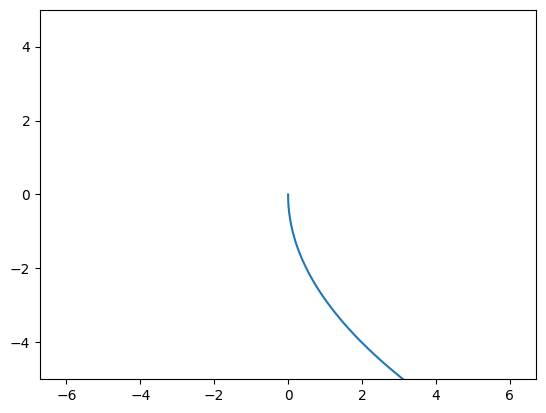

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1)
axs.plot(positions[:,0], positions[:,1])
axs.axis('equal')
axs.set_xlim(-5,5)
axs.set_ylim(-5,5)
plt.show()